In [4]:
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder #Imports one-hot encoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [5]:
#Read in data
df = pd.read_csv('agaricus-lepiota.data')
df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
#Check shape of DataFrame
df.shape

(8123, 23)

In [7]:
#Check column names
df.columns


Index(['p', 'x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 'e.1', 's.1',
       's.2', 'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u'],
      dtype='object')

In [8]:
#Locate column with missing values
df.loc[df['e.1'].isin(['?'])]
df.replace(['?'], pd.NA, inplace=True)
print("sum = ", df.isna().sum())

sum =  p         0
x         0
s         0
n         0
t         0
p.1       0
f         0
c         0
n.1       0
k         0
e         0
e.1    2480
s.1       0
s.2       0
w         0
w.1       0
p.2       0
w.2       0
o         0
p.3       0
k.1       0
s.3       0
u         0
dtype: int64


In [9]:
#There's only one column with missing data, so we only need to drop one column
df.drop(columns="e.1", inplace=True)

In [10]:
#Reassess shape of DataFrame with missing values removed
df.shape
for col in df:
    print(df[col].unique())

['e' 'p']
['x' 'b' 's' 'f' 'k' 'c']
['s' 'y' 'f' 'g']
['y' 'w' 'g' 'n' 'e' 'p' 'b' 'u' 'c' 'r']
['t' 'f']
['a' 'l' 'p' 'n' 'f' 'c' 'y' 's' 'm']
['f' 'a']
['c' 'w']
['b' 'n']
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
['e' 't']
['s' 'f' 'k' 'y']
['s' 'f' 'y' 'k']
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
['p']
['w' 'n' 'o' 'y']
['o' 't' 'n']
['p' 'e' 'l' 'f' 'n']
['n' 'k' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
['n' 's' 'a' 'v' 'y' 'c']
['g' 'm' 'u' 'd' 'p' 'w' 'l']


In [11]:
#Get the target from the dataframe
y = df.iloc[:, 0].values

In [12]:
#Checking to ensure correct selection
y

array(['e', 'e', 'p', ..., 'e', 'p', 'e'], dtype=object)

In [13]:
#Binary encoding of variables
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
print(y)

[0 0 1 ... 0 1 0]


In [14]:
df.columns

Index(['p', 'x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 's.1', 's.2',
       'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u'],
      dtype='object')

In [15]:
def oneHotIt(col_name):
    # Receives a column name as input
    # Returns a list of the column's OneHot contents as element zero
    return list(OneHotEncoder(sparse=False).fit_transform(df[[col_name]]))

oneHotList = [oneHotIt(k) for k in df.columns if k != 'p' and k != 'e.1']

In [16]:
#Dropping all unencoded columns
foo = df.copy()  # Temporary dataframe - don't delete initial df repeatedly during testing and have to restart kernel
for k in foo.columns:
    if k != 'p' and k != 'e.1':
        foo.drop(columns=k, inplace=True)
#print("foo columns = ", foo.columns)

In [17]:
#Convert list of OneHot arrays to a list of DataFrames
listOfDFs = [pd.DataFrame(df).astype(int) for df in oneHotList]

In [18]:
#Concat DataFrames for analysis
oneDF = pd.concat(listOfDFs, axis=1)

In [19]:
oneDF 

,0,1,2,3,4,5,0,1,2,3,...,3,4,5,0,1,2,3,4,5,6
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8119,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8120,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8121,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [20]:
#Ensuring correct dtypes
oneDF.dtypes

0    int64
1    int64
2    int64
3    int64
4    int64
     ...  
2    int64
3    int64
4    int64
5    int64
6    int64
Length: 112, dtype: object

In [21]:
#Defining X
X=oneDF.values

In [22]:
#Division of data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (6498, 112) (6498,)
Test set: (1625, 112) (1625,)


In [23]:
#Using tree classifier on training dataset
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [24]:
#Running tree classifier
y_predict=clf.predict(X_test)
y_predict

array([0, 1, 1, ..., 0, 0, 0])

In [25]:
#Checking accuracy of tree model
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Train set Accuracy:  1.0
Test set Accuracy:  1.0


In [26]:
#Evaluation of tree classifier with confusion matrix
labels=[0,1]
cm=confusion_matrix(y_test,y_predict,labels)
print(cm)

[[831   0]
 [  0 794]]


/Users/lizbolthouse/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [27]:
#Using KNeighbors classifier on training dataset
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [28]:
#Running KNeighbors classifier
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 1, 1, 0, 1])

In [29]:
#Checking accuracy of KNeighbors classifier
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  1.0


In [30]:
#Evaluation of KNeighbors classifier with confusion matrix
labels=[0,1]
cm=confusion_matrix(y_test,yhat,labels)
print(cm)

[[831   0]
 [  0 794]]


/Users/lizbolthouse/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [31]:
fvalue, pvalue = stats.f_oneway(X_train, X_test)
print("Values for X: ", fvalue, pvalue)
fvalue, pvalue = stats.f_oneway(y_train, y_test)
print("Values for Y: ", fvalue, pvalue)

Values for X:  [3.06717104e-01 1.00067749e+00 6.72048255e-02 4.98824059e+00
 2.26849989e+00 1.26566293e+00 6.25924716e-01 1.00067749e+00
 1.30505534e+00 1.58921659e-01 8.06453565e-01 4.63675096e-01
 4.20601083e-01 6.41733902e-01 1.08223339e+01 1.19119679e+00
 1.57726639e-02 5.65090968e+00 3.35121967e+00 1.04124455e+00
 5.49003061e-01 5.49003061e-01 8.00487685e-01 2.23652898e-01
 3.80187371e-02 5.33757073e+00 5.63687879e-01 1.89175179e-01
 4.26854967e+00 3.19125268e-01 1.11482499e+00 7.60381037e-01
 7.60381037e-01 1.62783591e-03 1.62783591e-03 2.56350925e+00
 2.56350925e+00 1.07723750e+00 9.55800991e-02 6.01388519e-02
 3.88556422e-01 6.99691173e-01 4.77037967e-01 1.73335483e+00
 1.40119879e+00 2.04907980e+00 9.59343777e-01 6.43213608e+00
 3.56739950e-01 9.38662104e-05 9.38662104e-05 4.12529900e+00
 6.76352574e-01 1.51343980e-01 8.47085243e-01 1.77238027e-01
 9.79330829e-02 2.75578798e-01 7.88726449e-04 3.08531425e-02
 5.63687879e-01 9.48683939e-01 6.08789937e-04 5.71108918e-03
 1.041703

/Users/lizbolthouse/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


In [32]:
#This section is preparation to do continuous variable visualizations. This was done in this notebook because
#this is where the one-hot encoding took place.
new_names = ['ConvexCap', 'BellCap', 'SunkenCap', 'FlatCap', 'KnobbedCap', 'ConicalCap', 'SmoothCap', 'ScalyCap',
             'FibrousCap', 'GroovedCap', 'YellowCap', 'WhiteCap', 'GreyCap', 'BrownCap', 'RedCap', 'PinkCap',
             'BuffCap', 'PurpleCap', 'CinnamonCap', 'GreenCap', 'BruisesTrue', 'BruisesFalse', 'Almond', 'Anise',
             'Pungent', 'None', 'Foul', 'Creosote', 'Fishy', 'Spicy', 'Musty', 'GillsFree', 'GillsAttached',
             'GillsCrowded', 'GillsDistant', 'GillsBroad', 'GillsNarrow', 'BlackGills', 'BrownGills', 'GrayGills',
             'PinkGills', 'WhiteGills', 'ChocolateGills', 'PurpleGills', 'RedGills', 'BuffGills', 'GreenGills',
             'YellowGills', 'OrangeGills', 'EnlargingStalk', 'TaperingStalk', 'SmoothAboveRing', 'FibrousAboveRing',
             'SilkyAboveRing', 'ScalyAboveRing', 'SmoothBelowRing', 'FibrousBelowRing', 'SilkyBelowRing',
             'ScalyBelowRing', 'WhiteAboveRing', 'GrayAboveRing', 'PinkAboveRing', 'BrownAboveRing', 'BuffAboveRing',
             'RedAboveRing', 'OrangeAboveRing', 'CinnamonAboveRing', 'YellowAboveRing', 'WhiteBelowRing', 
             'PinkBelowRing', 'GrayBelowRing', 'BuffBelowRing', 'BrownBelowRing', 'RedBelowRing', 
             'YellowBelowRing', 'OrangeBelowRing', 'CinnamonBelowRing', 'PartialVeil', 'WhiteVeil', 'BrownVeil', 
             'OrangeVeil', 'YellowVeil', 'OneRing', 'TwoRings', 'NoRings', 'PendantRing', 'EvanescentRing',
             'LargeRing', 'FlaringRing', 'NoRing', 'BrownSporePrint', 'BlackSporePrint', 'PurpleSporePrint', 
             'ChocolateSporePrint', 'WhiteSporePrint', 'GreenSporePrint', 'OrangeSporePrint', 'YellowSporePrint',
             'BuffSporePrint', 'NumerousPop', 'ScatteredPop', 'AbundantPop', 'SeveralPop', 'SolitaryPop',
             'ClusteredPop', 'Grasses', 'Meadows', 'Urban', 'Woods', 'Paths', 'Waste', 'Leaves']
oneDF.columns = new_names
print(oneDF.columns)
pd.set_option("display.max_columns", None)
print(oneDF)

Index(['ConvexCap', 'BellCap', 'SunkenCap', 'FlatCap', 'KnobbedCap',
       'ConicalCap', 'SmoothCap', 'ScalyCap', 'FibrousCap', 'GroovedCap',
       ...
       'SeveralPop', 'SolitaryPop', 'ClusteredPop', 'Grasses', 'Meadows',
       'Urban', 'Woods', 'Paths', 'Waste', 'Leaves'],
      dtype='object', length=112)
      ConvexCap  BellCap  SunkenCap  FlatCap  KnobbedCap  ConicalCap  \
0             0        0          0        0           0           1   
1             1        0          0        0           0           0   
2             0        0          0        0           0           1   
3             0        0          0        0           0           1   
4             0        0          0        0           0           1   
...         ...      ...        ...      ...         ...         ...   
8118          0        0          0        1           0           0   
8119          0        0          0        0           0           1   
8120          0        0          1 

In [54]:
#Preparation for the scatter plot. There was a noted relationship in the metadata between a white mushroom cap and
#a habitat of leaves, so we'd like to try and prove it out.
dfHabitatCapColor = oneDF[['WhiteCap', 'Leaves']]
grp_HCC = dfHabitatCapColor.groupby(['WhiteCap','Leaves']).size().unstack(level=0, fill_value=0)
grp_HCC.head()

WhiteCap,0,1
Leaves,,
0,7887,44
1,192,0


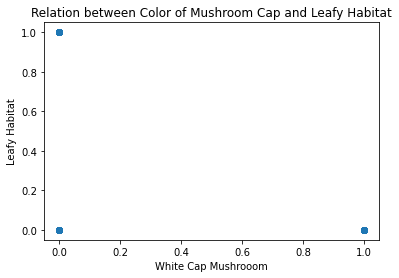

In [68]:
#Setting up the graph
x = dfHabitatCapColor['WhiteCap']
y = dfHabitatCapColor['Leaves']
plt.scatter(x, y)
plt.xlabel('White Cap Mushrooom') # Add to x-label to the plot
plt.ylabel('Leafy Habitat') # Add y-label to the plot
plt.title('Relation between Color of Mushroom Cap and Leafy Habitat') # Add title to the plot

plt.show()